In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_nlp = pd.read_csv('combined_data_with_nlp.csv')
df_topic = pd.read_csv('combined_data_zero_shot.csv')

In [3]:
df_nlp.head()

,text,sentiment,emotion,is_satire
0,blm resmi jd mantan tapi udah ngasih trauma te...,negative,sadness,False
1,papahku ditinggal meninggal gamau nikah lagi,negative,sadness,False
2,kecuali bapakku dia kok disuruh nikah lagi gam...,negative,sadness,False
3,atasan gw dah cepet nikah gih biar ga stress a...,negative,anger,False
4,gamau blajar maunya nikah aja ya gigi,negative,sadness,False


In [4]:
df_topic.head()

,text,predicted_label
0,blm resmi jadi mantan ngasih trauma sangat bes...,trauma masa lalu
1,papah tingal gamau nikah,tekanan sosial
2,bapak suruh nikah gamau terus,tekanan sosial
3,atas cepet nikah gih stres nafkahin gamau nika...,tekanan sosial
4,gamau ajar mau nikah gigi,tekanan sosial


# Visualisasi

## Sentiment

In [8]:
df_nlp['sentiment'].value_counts(normalize=True) * 100

sentiment
negative    84.153846
positive    11.538462
neutral      4.307692
Name: proportion, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'negative'), Text(1, 0, 'positive'), Text(2, 0, 'neutral')])

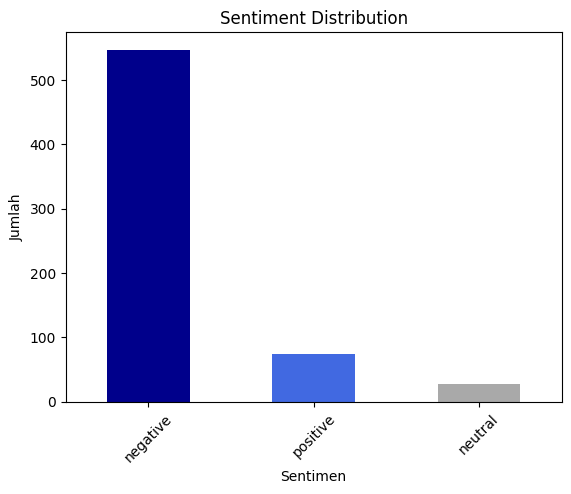

In [15]:
df_nlp['sentiment'].value_counts().plot(kind='bar', color=['darkblue', 'royalblue', 'darkgray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)

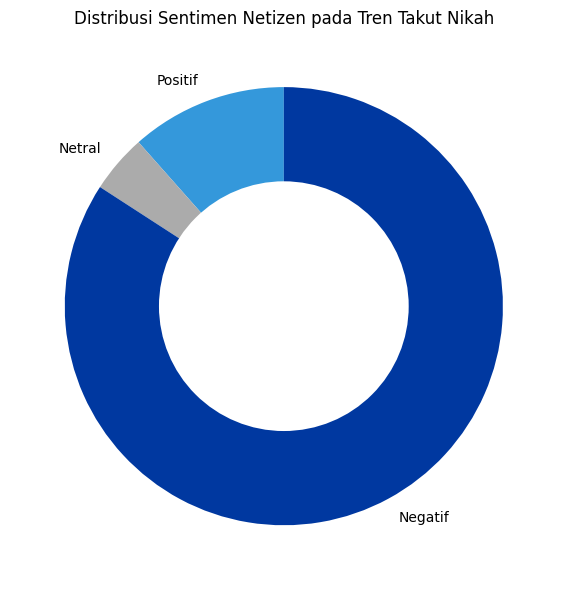

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Contoh data (ganti dengan data kamu sendiri)
sentiment_counts = pd.Series({
    'Positif': 11.54,
    'Netral': 4.31,
    'Negatif': 84.15
})

# Warna disesuaikan
colors = [
    '#3498db',  # Biru untuk Positif
    "#ABABAB",  # Abu-abu untuk Netral
    "#0038a0"   # Merah untuk Negatif
]

# Plot donut chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts = ax.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    # autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops=dict(color="black")
)

# Buat lubang di tengah agar menjadi donut
centre_circle = plt.Circle((0, 0), 0.57, fc='white')
fig.gca().add_artist(centre_circle)

# Judul dan layout
plt.title("Distribusi Sentimen Netizen pada Tren Takut Nikah")
plt.tight_layout()
plt.show()


## Emosi

In [34]:
df_nlp['emotion'].value_counts()

emotion
fear       421
sadness    135
anger       57
happy       33
love         4
Name: count, dtype: int64

In [35]:
df_nlp['emotion'].value_counts(normalize=True) * 100

emotion
fear       64.769231
sadness    20.769231
anger       8.769231
happy       5.076923
love        0.615385
Name: proportion, dtype: float64

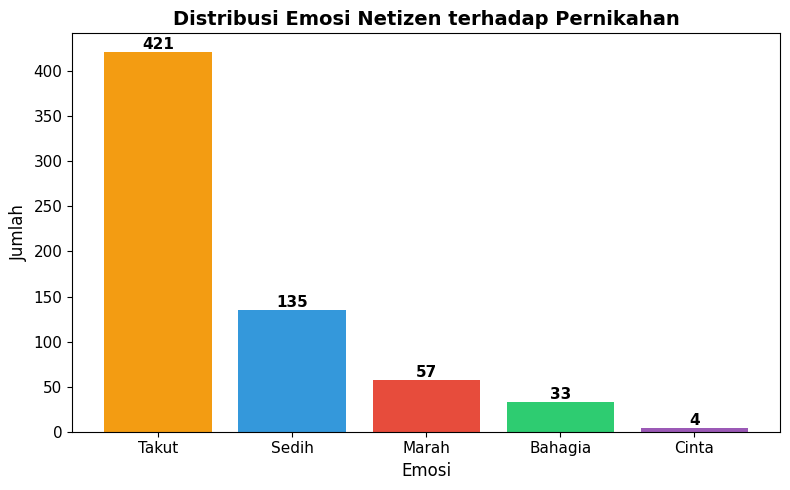

In [37]:
# Mapping label emosi ke Bahasa Indonesia
emotion_map = {
    'fear': 'Takut',
    'sadness': 'Sedih',
    'anger': 'Marah',
    'happy': 'Bahagia',
    'love': 'Cinta'
}

# Hitung jumlah emosi dan urutkan sesuai urutan di atas
emotion_counts = df_nlp['emotion'].map(emotion_map).value_counts().reindex(['Takut', 'Sedih', 'Marah', 'Bahagia', 'Cinta'])

# Plot dengan tampilan lebih menarik
plt.figure(figsize=(8,5))
bars = plt.bar(emotion_counts.index, emotion_counts.values, color=['#f39c12', '#3498db', '#e74c3c', '#2ecc71', '#9b59b6'])
plt.title("Distribusi Emosi Netizen terhadap Pernikahan", fontsize=14, fontweight='bold')
plt.xlabel("Emosi", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Tambahkan angka di atas bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## Zero shot alasan

In [41]:
df_topic['predicted_label'].value_counts()

predicted_label
tekanan sosial                    290
trauma masa lalu                  273
tidak percaya pasangan             50
takut gagal membangun keluarga     25
alasan ekonomi                     12
Name: count, dtype: int64

Text(0, 0.5, 'Jumlah Tweet')

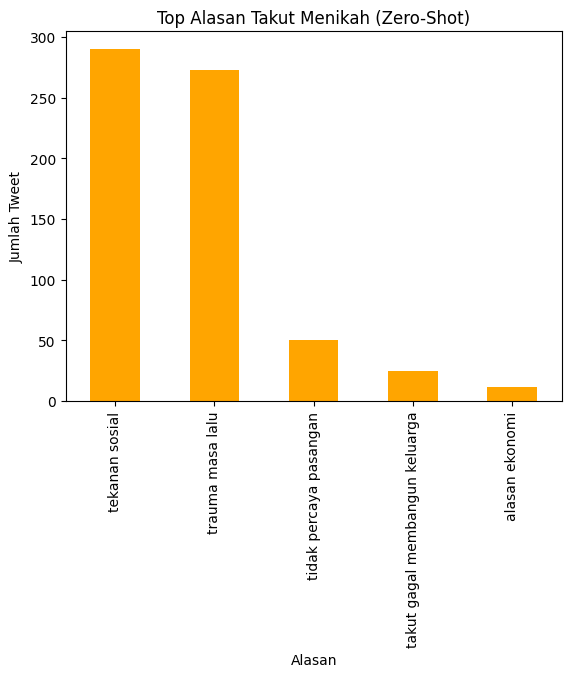

In [40]:
df_topic['predicted_label'].value_counts().head(5).plot(kind='bar', color='orange')
plt.title("Top Alasan Takut Menikah (Zero-Shot)")
plt.xlabel("Alasan")
plt.ylabel("Jumlah Tweet")

In [42]:
for label in df_topic['predicted_label'].unique():
    print(f"Contoh untuk label: {label}")
    display(df_topic[df_topic['predicted_label'] == label].head(3))
    print("-" * 40)

Contoh untuk label: trauma masa lalu


,text,predicted_label
0,blm resmi jadi mantan ngasih trauma sangat bes...,trauma masa lalu
7,blm resmi jadi mantan ngasih trauma sangat bes...,trauma masa lalu
46,perempuan skrg gamau nikah banyak nikah kali t...,trauma masa lalu


----------------------------------------
Contoh untuk label: tekanan sosial


,text,predicted_label
1,papah tingal gamau nikah,tekanan sosial
2,bapak suruh nikah gamau terus,tekanan sosial
3,atas cepet nikah gih stres nafkahin gamau nika...,tekanan sosial


----------------------------------------
Contoh untuk label: tidak percaya pasangan


,text,predicted_label
17,sedih aku keliling rekan kerja umur sepantaran...,tidak percaya pasangan
25,kalau jelang gamau nikah gembar gembor kep pri...,tidak percaya pasangan
30,umur genap usah bahas nikah segala kamu tahun ...,tidak percaya pasangan


----------------------------------------
Contoh untuk label: alasan ekonomi


,text,predicted_label
57,semangatin orang tua anak muda nikah takut pun...,alasan ekonomi
60,orang banyak takut nikah salah satu faktor eko...,alasan ekonomi
61,inded makanya skrg pikir nikah ngebiayain hidu...,alasan ekonomi


----------------------------------------
Contoh untuk label: takut gagal membangun keluarga


,text,predicted_label
64,pas aku daftar snmptn dulu jga nekat ketar tir...,takut gagal membangun keluarga
71,kak no salty aku cewe aku mikir hidup wanita t...,takut gagal membangun keluarga
78,asa ubah dikit cinta ma yah asa ubah samsek ni...,takut gagal membangun keluarga


----------------------------------------


## Satire or sarkas

Text(0.5, 1.0, 'Proporsi Tweet Satire')

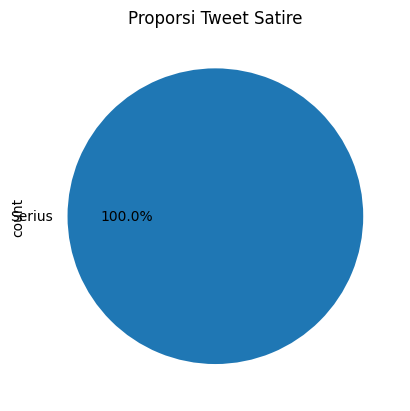

In [43]:
df_nlp['is_satire'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Serius', 'Satire'])
plt.title("Proporsi Tweet Satire")
